[Reference](https://medium.com/@tzjy/a-great-tool-to-portfolio-optimization-riskfolio-lib-python-code-included-d4e4d503541c)

In [2]:
pip install riskfolio-lib

     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 902 kB 34.3 MB/s 
     |████████████████████████████████| 11.2 MB 52.0 MB/s 
     |████████████████████████████████| 149 kB 60.0 MB/s 
     |████████████████████████████████| 9.8 MB 64.3 MB/s 
     |████████████████████████████████| 899 kB 42.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
# conda install -c mosek mosek

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4%}'.format

start = '2016-01-01'
end = '2019-12-30'

assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BNY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

assets.sort()

data = yf.download(assets, start = start, end =end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()
display(Y.head())

[*********************100%***********************]  25 of 25 completed


,APA,BA,BAX,BNY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,0.3841%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1729%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,0.3189%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,-0.1466%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-0.1271%,-1.1047%,-1.9769%,-1.2206%,-0.8855%,-4.6058%,-2.5394%,...,-2.2067%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,0.5729%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1367%,-0.7308%,-0.1448%,0.0896%,-3.3839%,-0.1117%,-1.1387%,-0.9720%,-1.1254%
2016-01-11,-4.3383%,0.1693%,-1.6851%,0.7595%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0331%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5366%,-0.4607%,0.5800%,-1.9919%


In [8]:
import riskfolio as rp

port = rp.Portfolio(returns=Y)

method_mu = 'hist'
method_cov = 'hist'

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
hist = True
rf = 0
l = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BNY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.6384%,10.7050%,7.0648%,0.0000%,7.6019%,0.0000%,3.7087%,0.0000%,0.0000%,...,9.9558%,0.0000%,0.0000%,0.0000%,0.0000%,6.6745%,0.0000%,0.0000%,3.8698%,0.0000%


In [23]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variances', others=0.05, nrow=25, cmap='tab20', height=6, width=10, ax=None)

In [14]:
points = 50
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())

,APA,BA,BAX,BNY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,2.3284%,57.5823%,1.4815%,1.2575%,2.4984%,1.0597%,0.0000%,0.1447%,...,4.9061%,0.0000%,4.9738%,0.0000%,3.9938%,1.8802%,0.0000%,0.2716%,2.9911%,0.3815%
1,0.0000%,1.1240%,5.2451%,48.5123%,1.0567%,3.3516%,1.2654%,2.0234%,0.0000%,0.0000%,...,7.3373%,0.0000%,0.5779%,0.0000%,1.3415%,3.3259%,0.0000%,0.0000%,4.7702%,0.0000%
2,0.0000%,1.7286%,5.9459%,43.9049%,0.5987%,4.0748%,0.5419%,2.2448%,0.0000%,0.0000%,...,7.9498%,0.0000%,0.0000%,0.0000%,0.2048%,3.8122%,0.0000%,0.0000%,5.4725%,0.0000%
3,0.0000%,2.1930%,6.5046%,39.8222%,0.0773%,4.5887%,0.0000%,2.4007%,0.0000%,0.0000%,...,8.3051%,0.0000%,0.0000%,0.0000%,0.0000%,4.1858%,0.0000%,0.0000%,5.6167%,0.0000%
4,0.0000%,2.5981%,6.9973%,35.9849%,0.0000%,4.9454%,0.0000%,2.5549%,0.0000%,0.0000%,...,8.4997%,0.0000%,0.0000%,0.0000%,0.0000%,4.4803%,0.0000%,0.0000%,5.4283%,0.0000%


In [19]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 6.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
riskfolio-lib 3.0.1 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


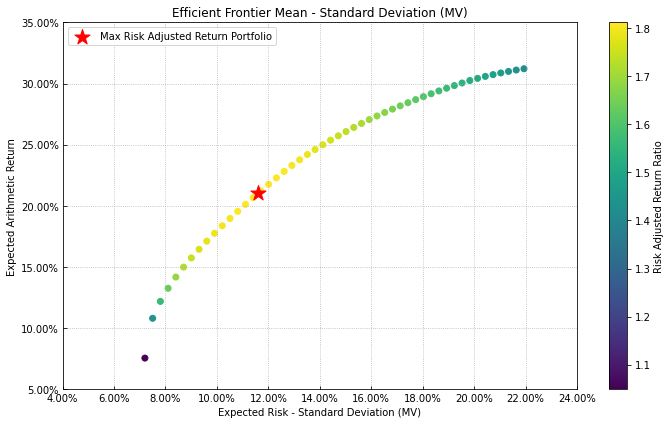

In [20]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

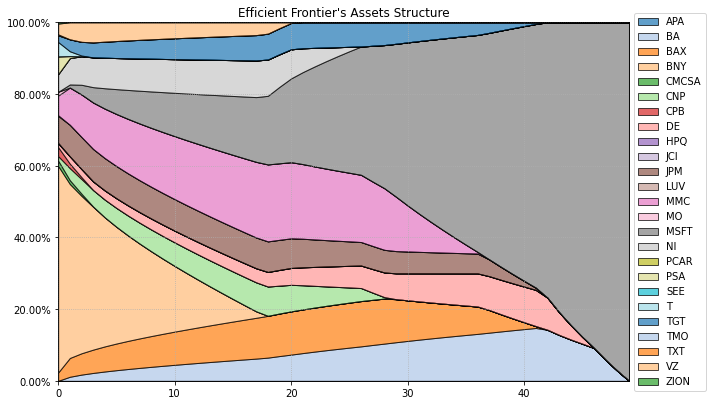

In [21]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap='tab20', height=6, width=10, ax=None)